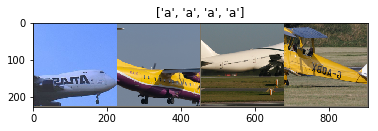

Epoch 0/8
----------
train Loss: 0.4908 Acc: 0.8437
val Loss: 0.0028 Acc: 1.0000

Epoch 1/8
----------
train Loss: 0.2631 Acc: 0.9074
val Loss: 0.0259 Acc: 0.9887

Epoch 2/8
----------
train Loss: 0.2469 Acc: 0.9223
val Loss: 0.0182 Acc: 0.9962

Epoch 3/8
----------
train Loss: 0.2292 Acc: 0.9311
val Loss: 0.0110 Acc: 1.0000

Epoch 4/8
----------
train Loss: 0.2031 Acc: 0.9385
val Loss: 0.0072 Acc: 1.0000

Epoch 5/8
----------
train Loss: 0.2122 Acc: 0.9355
val Loss: 0.0128 Acc: 1.0000

Epoch 6/8
----------
train Loss: 0.1629 Acc: 0.9491
val Loss: 0.0102 Acc: 0.9962

Epoch 7/8
----------
train Loss: 0.1475 Acc: 0.9565
val Loss: 0.0072 Acc: 0.9962

Epoch 8/8
----------
train Loss: 0.1308 Acc: 0.9671
val Loss: 0.0032 Acc: 1.0000

Training complete in 103m 35s
Best val Acc: 1.000000


In [14]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
#import imshow

plt.ion()   # interactive mode

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/mnt/data/CV2_data/coarse/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.005)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


model_fine = models.resnet18(pretrained=True)
#for param in model_conv.parameters():
 #   requires_grad = False
num_ftrs = model_ft.fc.in_features
model_fine.fc = nn.Linear(num_ftrs, 36)

model_fine = model_fine.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_fine.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_fine = train_model(model_fine, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=9)



In [50]:
ls val/test

2006683.jpg*  2091929.jpg*  2131569.jpg*  2175577.jpg*  2221710.jpg*
2014678.jpg*  2093456.jpg*  2132956.jpg*  2179486.jpg*  2221713.jpg*
2021679.jpg*  2096268.jpg*  2147232.jpg*  2195779.jpg*  2222716.jpg*
2022003.jpg*  2101942.jpg*  2148651.jpg*  2197330.jpg*  2226295.jpg*
2047538.jpg*  2101956.jpg*  2150934.jpg*  2211284.jpg*  2230120.jpg*
2048576.jpg*  2116123.jpg*  2161794.jpg*  2211337.jpg*  2244841.jpg*
2049579.jpg*  2123970.jpg*  2164961.jpg*  2217844.jpg*  2260054.jpg*
2069688.jpg*  2125414.jpg*  2169272.jpg*  2218009.jpg*
2079513.jpg*  2128061.jpg*  2170856.jpg*  2219120.jpg*


In [15]:
filename  = "coarse_2.sav"
pickle.dump(model_ft, open(filename, 'wb'))

In [68]:
# file = open("coarse_2.sav",'rb')
# model_cht = pickle.load(file)
model_cht = torch.load("fine_cht.pth")

In [70]:
coarse_pred=["aircrafts", "birds", "cars", "dogs", "flowers"]
fine_pred=["aircrafts@1", "aircrafts@2", "aircrafts@3", "aircrafts@4", "aircrafts@5", "aircrafts@6", "aircrafts@7", "birds@1", "birds@2", "birds@3", "birds@4", "birds@5", "birds@6", "birds@7", "birds@8", "birds@9", "birds@10", "birds@11","cars@1", "cars@2", "cars@3", "cars@4", "cars@5", "cars@6", "cars@7", "cars@8", "dogs@1", "dogs@2", "dogs@3", "dogs@4", "dogs@5", "flowers@1", "flowers@2", "flowers@3", "flowers@4", "flowers@5"]

In [71]:
#coarse_pred=["aircrafts", "birds", "cars", "dogs", "flowers"]
data_transforms = {
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


data_dir = './'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in [ 'val']}
print(os.path.join(data_dir, 'val'))



dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=False, num_workers=4)
              for x in [ 'val']}



dataset_sizes = {x: len(image_datasets[x]) for x in ['val']}

class_names = image_datasets['val'].classes


device = "cpu"

./val


In [74]:
def visualize_model(model, num_images=24):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    file1 = open("fine_results.txt","w")#write mode

    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            #print(inputs)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for i in preds:
                file1.write(fine_pred[i.item()])
                file1.write("\n")
            #print(preds)
           
        file1.close()
        model.train(mode=was_training)

In [75]:
visualize_model(model_cht)

<Figure size 432x288 with 0 Axes>